In [ ]:
Resolução da Prova 1 - MCF-II 2024/2

**Disciplina**: Mecânica Estatística II

**Professor**: S. Gonçalves

**Aluno**: Vítor Güez Abrantes Marques

## Introdução

Neste notebook, apresentamos uma solução completa e detalhada para a Prova 1 da disciplina de Mecânica Estatística II (2024/2), abordando os métodos numéricos de Euler e Runge-Kutta de 2ª ordem (RK2) para a EDO:

\[
\frac{dy}{dx} = -2xy, \quad y(0) = 10,
\]

cuja solução exata é \(y(x) = 10e^{-x^2}\). Utilizaremos Python para implementar, comparar e analisar o erro global médio desses métodos.

In [ ]:
## 1. Definições Iniciais

**Equação diferencial**:

\[
\frac{dy}{dx} = f(x,y) = -2xy,
\]

**Condição inicial**: \(x_0 = 0, y_0 = 10\)

**Intervalo**: \([0,3]\)

**Solução exata**:

\[
y_{\rm ex}(x) = 10e^{-x^2}.
\]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Solução exata
def y_exact(x):
    """Retorna y(x) = 10 * exp(-x^2)."""
    return 10 * np.exp(-x**2)

# Teste rápido da função exata
x_test = np.array([0, 1, 2])
print("y_exact([0,1,2]) =", y_exact(x_test))

y_exact([0,1,2]) = [10.          3.67879441  0.18315639]


In [ ]:
# 2. Método de Euler

O método explícito de Euler aproxima a solução através de:

\[
y_{n+1} = y_n + f(x_n, y_n)\,\Delta x.
\]

### Implementação do método de Euler em python

In [3]:
def euler(f, x0, y0, xf, dx):
    '''
    Aplica o método de Euler para dy/dx = f(x,y).

    Parâmetros:
    - f: função f(x,y)
    - x0, y0: condição inicial
    - xf: valor final de x
    - dx: passo

    Retorna:
    - x: array de pontos
    - y: array das aproximações numéricas
    '''
    N = int((xf - x0)/dx)
    x = np.linspace(x0, xf, N+1)
    y = np.zeros_like(x)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + f(x[n], y[n]) * dx
    return x, y

# Parâmetros iniciais
x0, y0 = 0.0, 10.0
xf = 3.0
dx = 0.2
f = lambda x, y: -2 * x * y

# Aplicando Euler
x_euler, y_euler = euler(f, x0, y0, xf, dx)

In [ ]:
2(a) Gráfico comparativo: Euler vs Solução Exata
Plotamos a solução numérica de Euler (com Δx = 0.2) ao lado da solução exata.


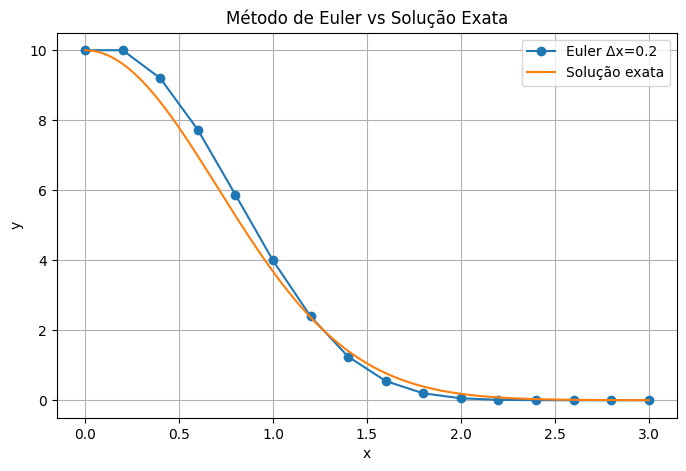

In [4]:
plt.figure(figsize=(8,5))
plt.plot(x_euler, y_euler, 'o-', label='Euler Δx=0.2')
x_cont = np.linspace(x0, xf, 300)
plt.plot(x_cont, y_exact(x_cont), '-', label='Solução exata')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Euler vs Solução Exata')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

## 3. Método de Runge-Kutta de 2ª Ordem (RK2)

Utilizaremos o método do ponto médio:

\[
\begin{aligned}
 k_1 &= f(x_n, y_n), \\plt.figure(figsize=(8,5))
plt.plot(x_euler, y_euler, 'o-', label='Euler Δx=0.2')
x_cont = np.linspace(x0, xf, 300)
plt.plot(x_cont, y_exact(x_cont), '-', label='Solução exata')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método de Euler vs Solução Exata')
plt.legend()
plt.grid(True)
plt.show()
 k_2 &= f\bigl(x_n + \tfrac{\Delta x}{2}, y_n + \tfrac{\Delta x}{2} k_1\bigr), \\
 y_{n+1} &= y_n + k_2\,\Delta x.
\end{aligned}
\]

In [5]:
### Implementação do RK2

def rk2_midpoint(f, x0, y0, xf, dx):
    """
    Implementa o método de Runge-Kutta de 2ª ordem (ponto médio).
    """
    N = int((xf - x0)/dx)
    x = np.linspace(x0, xf, N+1)
    y = np.zeros_like(x)
    y[0] = y0
    for n in range(N):
        k1 = f(x[n], y[n])
        k2 = f(x[n] + dx/2, y[n] + dx/2 * k1)
        y[n+1] = y[n] + k2 * dx
    return x, y

# Aplicando RK2
x_rk2, y_rk2 = rk2_midpoint(f, x0, y0, xf, dx)

###3(b) Gráfico comparativo: Euler, RK2 e Solução Exata

Neste gráfico, comparamos as duas aproximações numéricas (Euler e RK2) com a solução exata.

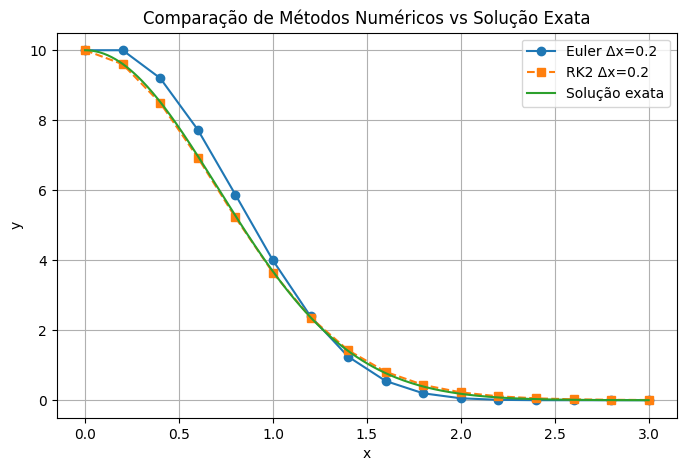

In [7]:
plt.figure(figsize=(8,5))
plt.plot(x_euler, y_euler, 'o-', label='Euler Δx=0.2')
plt.plot(x_rk2, y_rk2, 's--', label='RK2 Δx=0.2')
plt.plot(x_cont, y_exact(x_cont), '-', label='Solução exata')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparação de Métodos Numéricos vs Solução Exata')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
## 4. Erro Global Médio (Euler)

Definimos o erro global médio como:

\[
E_{\text{global}} = \sqrt{\frac{1}{N} \sum_{i=1}^N (y_n(x_i) - y(x_i))^2}.
\]

### Função para cálculo do erro global

In [8]:
def global_error(f_method, f, x0, y0, xf, dx):
    """
    Calcula o erro global médio para um método numérico.
    """
    x, y_num = f_method(f, x0, y0, xf, dx)
    y_ex = y_exact(x)
    return np.sqrt(np.mean((y_num - y_ex)**2))

### 4(a) Variação de Δx e cálculo do erro (Euler)

Vamos variar Δx de 0.01 a 0.2 (escala logarítmica) e calcular E_global para o método de Euler.

In [9]:
dx_values = np.logspace(np.log10(0.01), np.log10(0.2), 20)
errors_euler = [global_error(euler, f, x0, y0, xf, dx) for dx in dx_values]

#### 4(b) Gráfico log-log: E_global vs Δx (Euler)

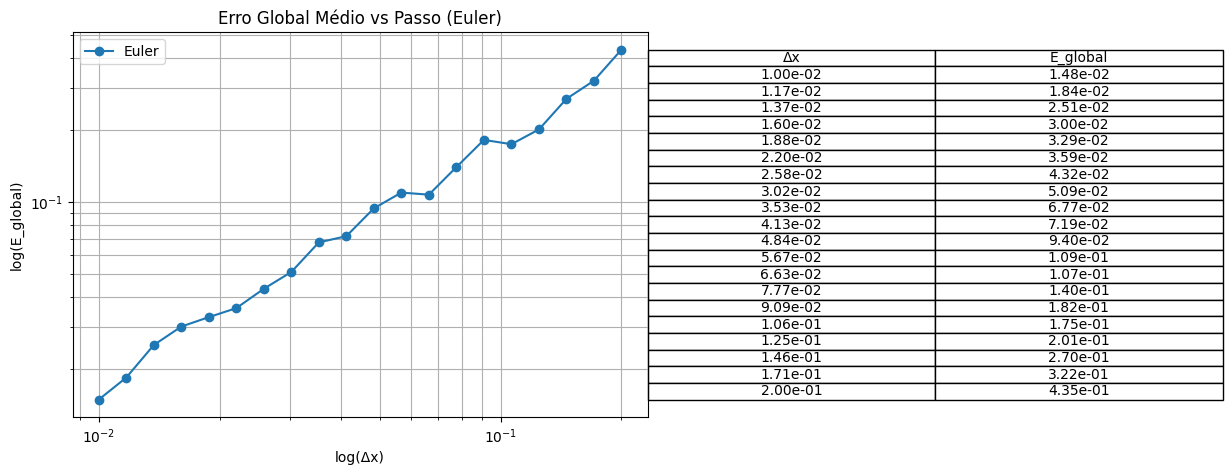

In [18]:
import matplotlib.pyplot as plt

# Cria a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 5))

# Plota os dados
ax.loglog(dx_values, errors_euler, 'o-', label='Euler')
ax.set_xlabel('log(Δx)')
ax.set_ylabel('log(E_global)')
ax.set_title('Erro Global Médio vs Passo (Euler)')
ax.grid(True, which='both')
ax.legend()

# Cria os dados da tabela
cell_text = [[f'{x:.2e}', f'{y:.2e}'] for x, y in zip(dx_values, errors_euler)]
columns = ['Δx', 'E_global']

# Adiciona a tabela à direita do gráfico
table = plt.table(cellText=cell_text,
                  colLabels=columns,
                  loc='right',
                  cellLoc='center')

# Ajusta o layout para não cortar nada
plt.subplots_adjust(right=0.7)

plt.show()


## 5. (Bônus) Erro Global Médio para RK2

Repetimos o procedimento para o método RK2 e comparamos ambos em um único gráfico.

In [15]:
errors_rk2 = [global_error(rk2_midpoint, f, x0, y0, xf, dx) for dx in dx_values]

### Gráfico comparativo de erros (Euler vs RK2)

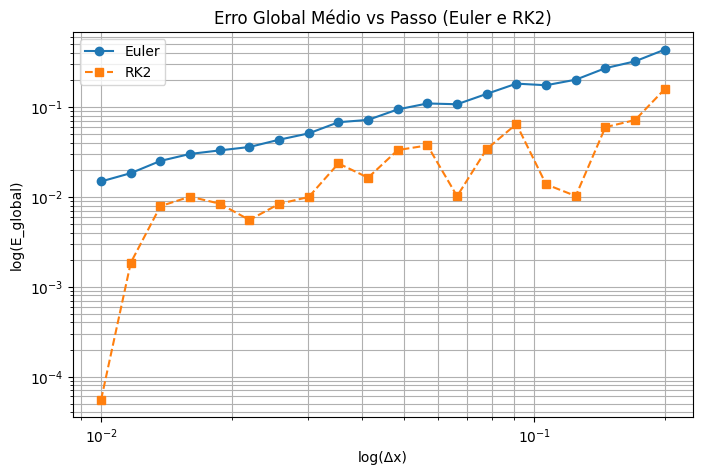

In [19]:
plt.figure(figsize=(8,5))
plt.loglog(dx_values, errors_euler, 'o-', label='Euler')
plt.loglog(dx_values, errors_rk2, 's--', label='RK2')
plt.xlabel('log(Δx)')
plt.ylabel('log(E_global)')
plt.title('Erro Global Médio vs Passo (Euler e RK2)')
plt.grid(True, which='both')
plt.legend()
plt.show()


**Conclusão**:

1. O método de Euler apresenta convergência de primeira ordem, visível pela inclinação aproximada de 1 no gráfico log-log.
2. O método RK2 (ponto médio) apresenta convergência de segunda ordem, com inclinação aproximada de 2 no gráfico log-log.

